# Project 9: Company Data 

In [ ]:
# Importing Libraries  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Loading Data  
company_data = pd.read_csv("D:/Company_Data.csv")

In [68]:
#preprocessing 
df1= company_data.copy()
df1.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [5]:
#calling the read data function
df1.shape

(400, 11)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df1.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


#2.EDA 

In [8]:
df1.groupby(['US']).sum()['Sales']

US
No      968.87
Yes    2029.66
Name: Sales, dtype: float64

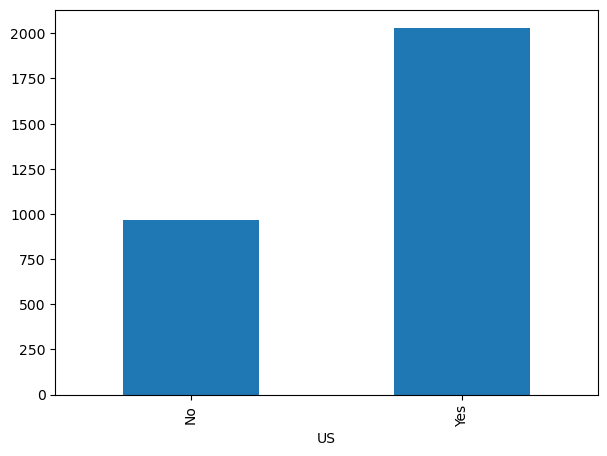

In [10]:
plt.figure(figsize = (7,5))
df1.groupby(['US']).sum()['Sales'].plot(kind='bar')
plt.show()

In [11]:
df1.groupby(['Urban']).sum()['Sales']

Urban
No      892.50
Yes    2106.03
Name: Sales, dtype: float64

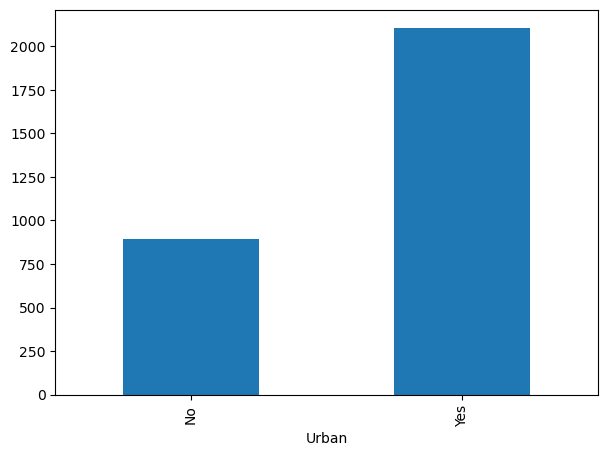

In [13]:
plt.figure(figsize = (7,5))
df1.groupby(['Urban']).sum()['Sales'].plot(kind='bar')
plt.show()

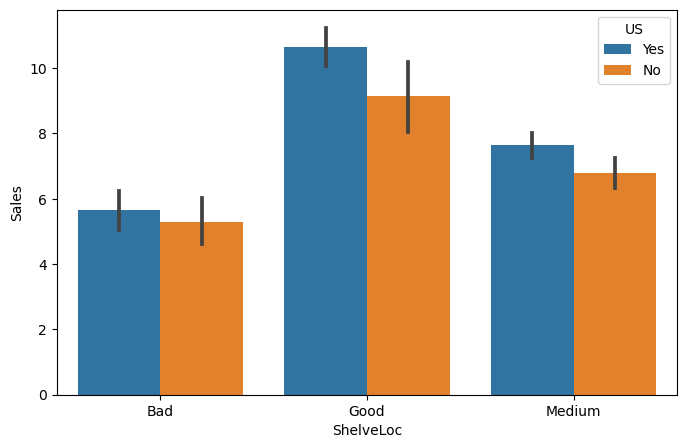

In [14]:
plt.figure(figsize = (8,5))
sns.barplot(x='ShelveLoc', y ='Sales', hue='US', data = df1)
plt.show()

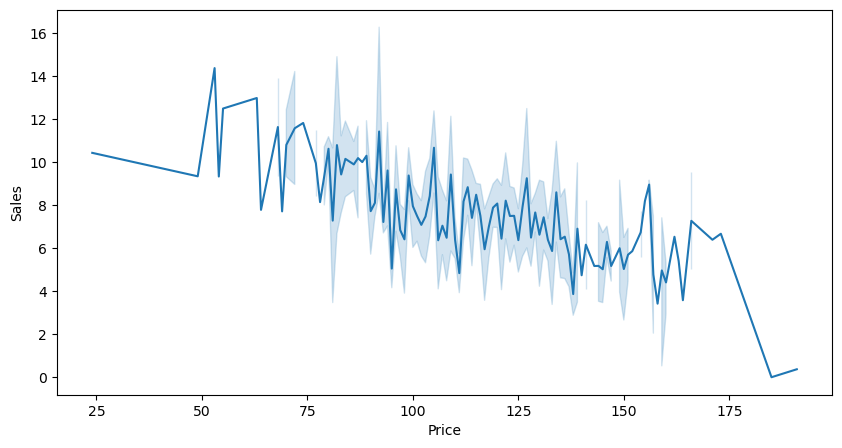

In [15]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Price', y ='Sales', data = df1)
plt.show()

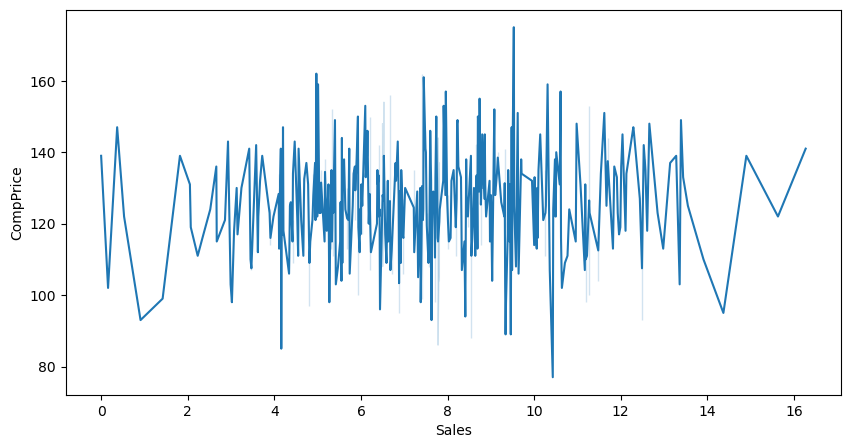

In [5]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Sales', y ='CompPrice', data = df1)
plt.show()

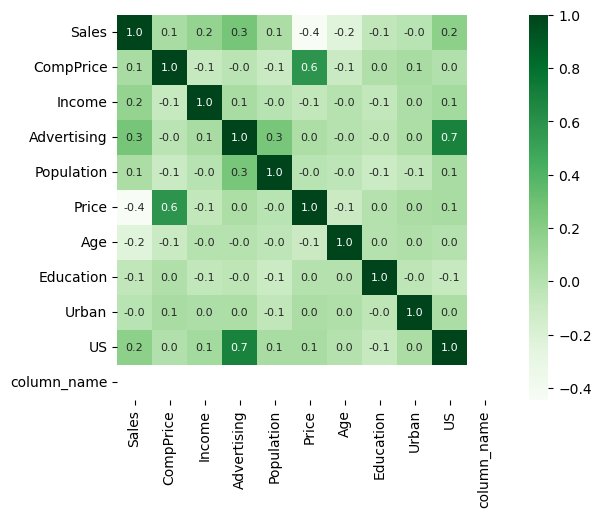

In [67]:
## Correlation 
correlation = df1.corr()
plt.figure(figsize = (7,5))
sns.heatmap(correlation, annot = True, cbar = True,square =True, annot_kws={'size':8}, fmt='.1f', cmap='Greens')
plt.show()



In [13]:
# Total sales in US and Urban areas
us_urban = df1[(df1['Urban']=='Yes') & (df1['US']=='Yes')]['Sales'].sum()
print('Total sales in US and Urban areas',us_urban )

Total sales in US and Urban areas 1434.24


In [14]:
## Total sales in non-US and non-urban areas
non_us_urban = df1[(df1['Urban']=='No') & (df1['US']=='No')]['Sales'].sum()
print('Total sales in non-US and non-urbsn areas',non_us_urban )

Total sales in non-US and non-urbsn areas 297.08


In [15]:
# Total advertising in US 
df1['Advertising'].sum()

2654

In [16]:
max_sales = df1[df1['Sales'].max()==df1['Sales']]
print('Maximum sales',max_sales)

Maximum sales      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
376  16.27        141      60           19         319     92      Good   44   

     Education Urban   US  
376         11   Yes  Yes  


In [17]:
# Total number of customer bwteen age 15 -40
age_x =len(df1[df1['Age'].between(15,40)])
print('Total number of customer bwteen age 15 - 40 =',age_x)

Total number of customer bwteen age 15 - 40 = 103


In [20]:
# Replace Yes to 1 and No to 0
df1['Urban']=df1['Urban'].replace({'Yes':1, 'No':0})
df1['US']=df1['US'].replace({'Yes':1, 'No':0})
df1.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,1,1


In [21]:
df1['ShelveLoc'].value_counts()

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

In [22]:
## Dummy creation of ShelveLoc
get_dummy = pd.get_dummies(df1['ShelveLoc'])

In [23]:
df3=pd.concat([df1,get_dummy], axis=1)
df3.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Bad,Good,Medium
0,9.50,138,73,11,276,120,Bad,42,17,1,1,True,False,False
1,11.22,111,48,16,260,83,Good,65,10,1,1,False,True,False


In [24]:
## Average sales calculation 
avr_sales = df3['Sales'].mean()
avr_sales

7.496325000000001

In [25]:
# Using average sales to categorical variable prersemtatio
df3['Sales']=df1['Sales'].apply(lambda y_value: 1 if y_value <=7.5 else 0)

 * Splitting of data

In [27]:
X = df3[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US', 'Bad','Good','Medium']]
X.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Bad,Good,Medium
0,138,73,11,276,120,42,17,1,1,True,False,False
1,111,48,16,260,83,65,10,1,1,False,True,False


In [28]:
y=df3['Sales']

In [69]:
# Training of the Model 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=124)

# Create the Random Forest classifier model
model_rf = RandomForestClassifier(criterion='entropy', max_depth=9)

# Train the model on the training set
train_model = model_rf.fit(X_train, y_train)

# Make predictions on the testing set
prediction = train_model.predict(X_test)

prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [33]:
acc_score = accuracy_score(prediction,y_test)
print('Accuracy of model =',acc_score)

Accuracy of model = 0.775
